# Data Analyst Project 
# Database Chosen: Airbnb Sydney 
### Github Username: nghugo88

# Open Libraries Used

Pandas

Seaborn

Pandas Profiling

Numpy

MatPlotLibrary

GeoPandas

Fiona

Shapely

OS

Counter 

Datetime
    

# Table Of Content

## 1. Introduction

## 2. Interesting Data And Informations

## 3. Room Types + Property Types Analysis

## 4. Suburbs Analysis

## 5. Price Trends, Policies and Reviews Figure in Accordance To Price Range

## 6. Map Charts And In-Depth Location Analysis

# 1. Introduction
### Welcome to my data analyst research, I will be exploring some important and interesting data of Airbnb in Sydney . I chose Airbnb as my main dataset is because i have used Airbnb quite a few times before and i  realised most of the profiles of the hosts are either someone else or an accomodation compnay.  

#### Data Set Chosen: 
-> Airbnb Sydney Database

#### Data Set Location:
-> InsiderAirbnb

#### Description Of Dataset
-> This dataset covers a variety of things ranging from neighbourhoods to other important figures.

## Preparing The Required Libraries

In [20]:
%pylab inline
import pandas
from collections import Counter
import seaborn
import pandas_profiling
import numpy
import matplotlib
import geopandas
import fiona
import shapely
import os
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.dates as mdates
%matplotlib inline
plt.rcParams['figure.figsize']= (50,50)

Populating the interactive namespace from numpy and matplotlib


# Preparing and getting data ready for analysis

In [21]:
mapdata = geopandas.read_file('NSW_LOCALITY_POLYGON_shp.shp')

In [22]:
data = pandas.read_csv('Desktop/listings.csv')

In [23]:
data2 = pandas.read_csv('Desktop/listings2.csv')

price = data2['price']
prices = []

for p in price:
    p = float(p[1:].replace(',', ''))
    prices.append(p)

data2['price'] = prices

C:\Users\Hugo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
data3 = pandas.read_csv('Desktop/calendar.csv')
price = data3['price']
prices = []

for p in price:
    p = re.sub('[^0-9.]+','', p)
    prices.append(float(p))
    
# Using New Column For Price Because Default is too hard to understand
data3['price'] = prices

data3 = data3[data3.price >= 0]

# Renaming Y/D/O/M
data3['Year'],data3['Month'],data3['Day']=data3['date'].str.split('-',2).str

In [52]:
# pandas_profiling.ProfileReport(data)

# 2. Collecting and going through some "interesting" and "important" information of this dataset

### 2.1 - Average Prices Of Neighbourhood + Number Of Listings


### 2.2 - Most Common Host Names


### 2.3 - Most Common Punctuations In listings descriptions


# 2.1 - Average Prices Of Neighbourhood + Number Of Listings

In [43]:
nh = Counter(data2['neighbourhood_cleansed'])
neighborhood_names = list(nh.keys())

nh_prices = data2[['neighbourhood_cleansed', 'price']]
nh_prices.columns = ['neighbourhood', 'price']
# Selecting The Row W Listings
nh_prices = nh_prices[nh_prices['neighbourhood'].isin(neighborhood_names)]
nh_prices_group = nh_prices.groupby('neighbourhood')
nh_prices = nh_prices_group['price'].agg(np.mean)
nh_prices = nh_prices.reset_index()
nh_prices['number of listings'] = nh.values()
nh_prices.head(11)

,neighbourhood,price,number of listings
0,Ashfield,138.286164,9746
1,Auburn,145.030948,1853
2,Bankstown,99.372093,987
3,Blacktown,84.178808,1624
4,Botany Bay,117.838435,1408
5,Burwood,92.504032,5438
6,Camden,120.630435,533
7,Campbelltown,140.163636,1177
8,Canada Bay,149.202532,313
9,Canterbury,101.043228,1331


In [54]:
nh_prices.head(21)

,neighbourhood,price,number of listings
0,Ashfield,138.286164,9746
1,Auburn,145.030948,1853
2,Bankstown,99.372093,987
3,Blacktown,84.178808,1624
4,Botany Bay,117.838435,1408
5,Burwood,92.504032,5438
6,Camden,120.630435,533
7,Campbelltown,140.163636,1177
8,Canada Bay,149.202532,313
9,Canterbury,101.043228,1331


We see that Ashfield has the largest listings of over 9000 followed by Auburn then Bankstown. Strangely, it's not within the CBD. But as we look into the graph, we realise a trend, the further away the place it is from the CBD, it cheaper the price average gets. Take Bankstown and Blacktown for an example, they only have an average price of $80 -> $100 compared to suburbs that are near CBD such as Redfern and Ashfield which are around $100 -> $200 price range.

# 2.2 - Now Let's check what's the most common name for host

In [60]:
summary = data2[['host_name']]
summary = summary[pandas.notnull(summary['host_name'])]

lastname = []

# Using for loop to filter names and creating a dictionary of them
for detail in summary['host_name']:
    if detail != 0:
        for i in detail.split():
            lastname.append(i)
lastname = Counter(lastname)
word_count = pandas.DataFrame.from_dict(lastname, orient='index').sort_values(by=0)
word_count.columns = ['host_name']
# From Most Common to least
word_count = word_count.sort_values(by=['host_name'], ascending=False)
word_count.head(15)

,host_name
&,810
David,439
And,418
Michael,271
Sarah,263
The,256
Paul,251
MadeComfy,247
John,229
Peter,223


In [55]:
word_count.head(21)

,host_name
&,810
David,439
And,418
Michael,271
Sarah,263
The,256
Paul,251
MadeComfy,247
John,229
Peter,223


After analysing the names, we can tell that "&" is very common which generally means there are more than 2 owners of the listing. If we look more into it, there are a lot of "Holiday", "Accommodation" ETC meaning that many holiday companies are using Airbnb as a platform to reach out to get new customers.

# 2.3 - Most Common Punctuations In listings descriptions

In [62]:
summary2 = data2[['summary']]
summary2 = summary2[pandas.notnull(summary2['summary'])]

conclusion = []

# Using for loop to filter names and creating a dictionary of them
for detail in summary2['summary']:
    if detail != 0:
        for i in detail.split():
            conclusion.append(i)
conclusion = Counter(conclusion)
word_count = pandas.DataFrame.from_dict(conclusion, orient='index').sort_values(by=0)
word_count.columns = ['summary']
# From Most Common to least
sum_count = word_count.sort_values(by=['summary'], ascending=False)
sum_count.head(10)

,summary
and,89618
the,73029
to,65996
a,52880
is,35145
in,35110
with,34820
of,31781
for,20083
from,17344


In [63]:
sum_count.head(21)

,summary
and,89618
the,73029
to,65996
a,52880
is,35145
in,35110
with,34820
of,31781
for,20083
from,17344


From this, we can tell that unique words like "and", "the", "walk", "restaurant", "distance", "public", "street", "block" are very commonly used words when hosts are describing their homes.

This is generally done as people use Airbnb for these types of purpose rather than going to a luxury hotel, they want to live in something convenient and have a pplace that they would feel at home which they look for these key words as it attracts more people's attention when listing these houses.

# 3. Room Types + Property Types Analysis


## 3.1 - Most Common Room Type ( Pie Chart )


## 3.2 - Most Common Room Type ( Bar Chart )


## 3.3 - Property Type Analysis


## 3.4 - Room Types With Price Mean

## 3.1 - First Off, We Will start off with Room Types Analysis

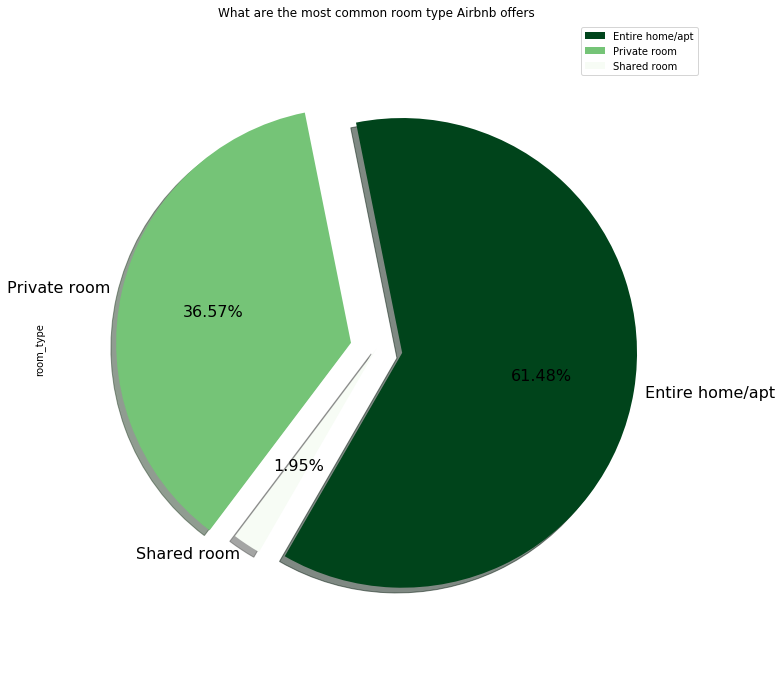

In [283]:
pandas.value_counts(data['room_type']).plot(kind='pie',colormap = 'Greens_r',shadow=True, startangle=240, figsize = (12, 12), radius=0.9, labeldistance=1.05,fontsize = 16, autopct='%.2f%%', legend = 1, explode = (0.1, 0.1,0))
title('What are the most common room type Airbnb offers', color = 'black')
plt.show()

## 3.2 - Let's Use another chart to represent this data.

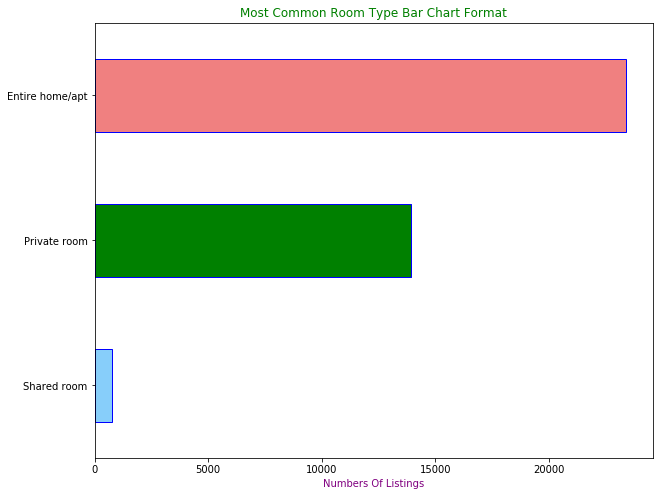

In [286]:
pandas.value_counts(data['room_type']).plot(kind='barh',color=['lightcoral', 'green', 'lightskyblue'], figsize = (10, 8), edgecolor='blue').invert_yaxis()
title('Most Common Room Type Bar Chart Format', color = 'g')
xlabel('Numbers Of Listings', color = 'purple')
plt.show()

Here, we see that Entire Home/Apartment includes over 60% of the total listing followed by Private Room. This tells us that shared room is an unpopular choice for people hence for the lowest number of listings and also telling us that the idea that people prefer paying more for privacy rather than sharing the same room with a stranger.

## 3.3 - Let's Go Deeper into this Data to find out more!

In [93]:
# Setting Up Variables for the data
property_type_data2 = data2.groupby('property_type').id.count()
property_type_data2 = property_type_data2.reset_index()
property_type_data2 = property_type_data2.rename(columns={'id': 'number_of_listings'})
objects = property_type_data2['property_type']
y_pos = property_type_data2['number_of_listings']

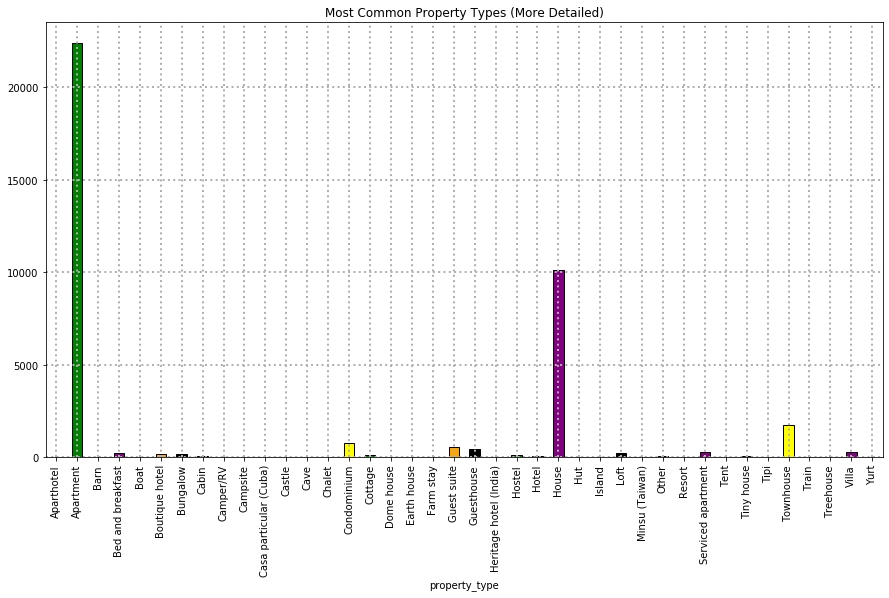

In [92]:
# Creating The Bar Chart
property_type_data2.plot.bar(x = 'property_type', y = 'number_of_listings',figsize = (15, 8),legend = False,edgecolor='black', color=['yellow', 'green', 'cyan', 'purple', 'red', 'orange', 'black'])
title('Most Common Property Types (More Detailed)')
xlabel = 'Propert Types'
ylabel = 'Amount Of Listings'
plt.grid(linestyle=':', linewidth=2)
plt.show()

As we look deeper, we realised that there are more than just 3 types of room and there's also some wierd properties such as an Indian Heritage Hotel as well as some other properties that we haven't seen before from the room types which are Townhouse, Loft and ETC.

## 3.4 - Let's Now Make A Heat Map For These Room Types With Price Mean

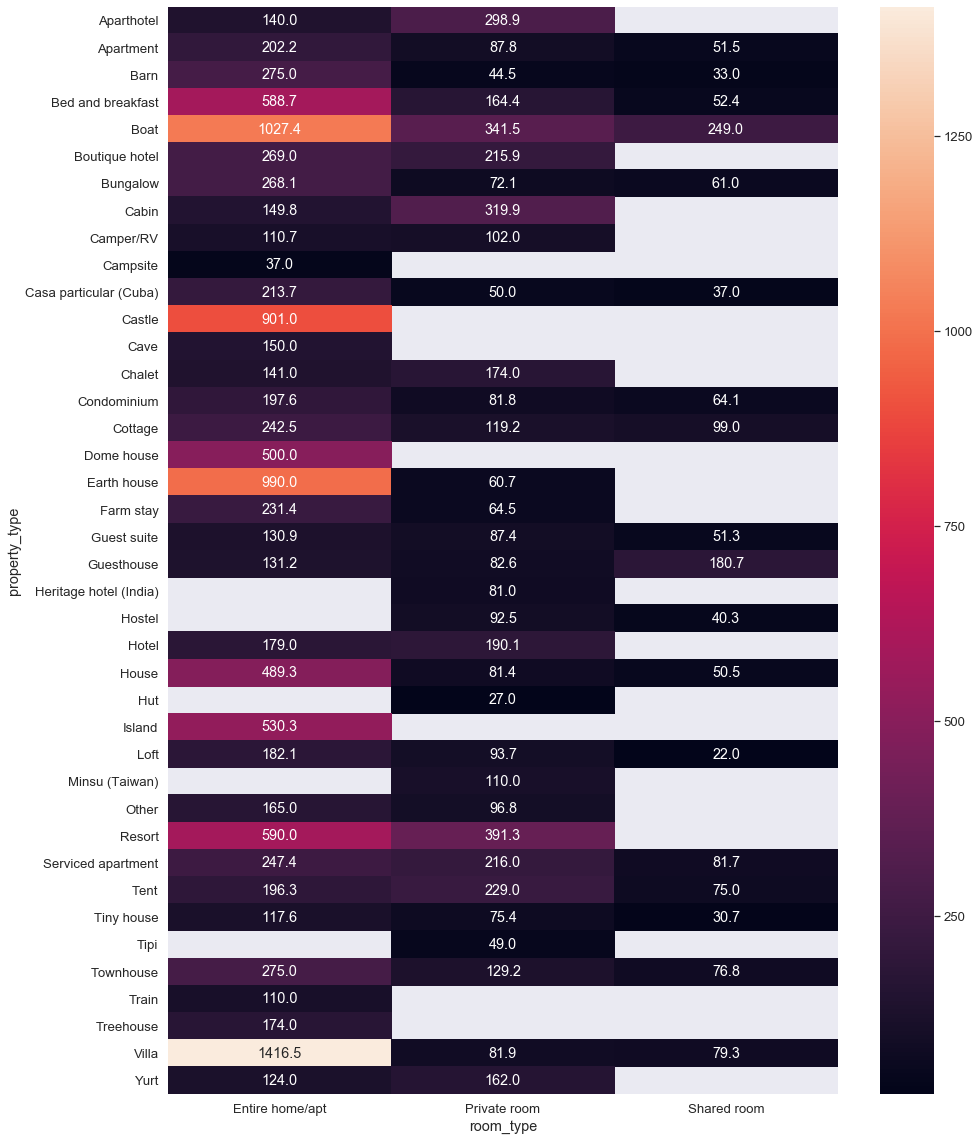

In [22]:
plt.figure(figsize=(15, 20))
seaborn.heatmap(data2.groupby(['property_type', 'room_type']).price.mean().unstack(), annot=True, fmt='.1f')
plt.show()

From the Heatmap, we acknowledge that the price tends to go from most expensive from entire homes/apartments to cheapest which are the shared rooms. While there are rooms as low as $20 for shared rooms and up to 1000 + for Villa and Earth house.

# 4. Suburbs Analysis!

## 4.1 - Listings In Different Suburbs

## 4.2 - Price Average in Every Suburb

## We will start off with a bar chart explaining the listings across Sydney first.

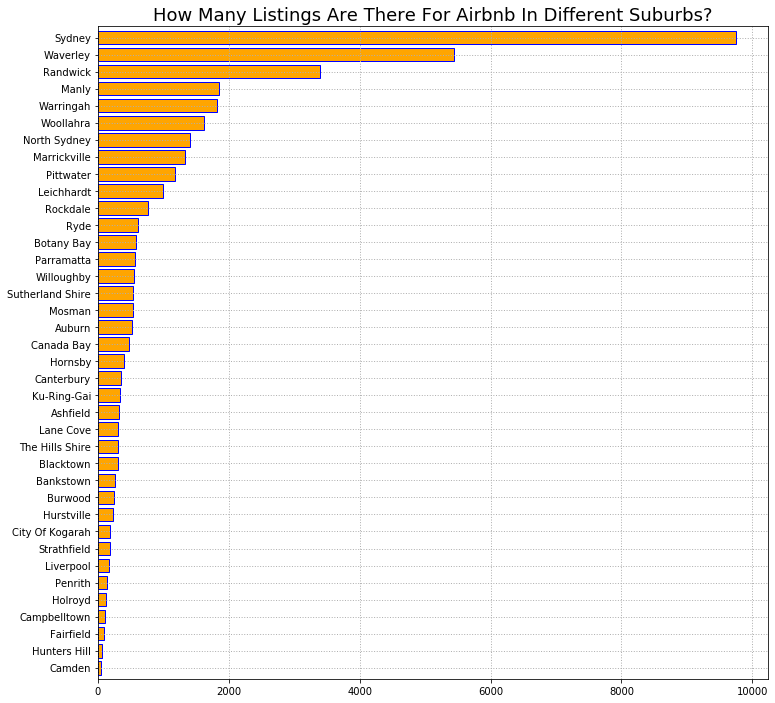

In [106]:
pandas.value_counts(data['neighbourhood']).plot(kind='barh', color = 'orange', width=0.8,figsize=(12,12),edgecolor='blue').invert_yaxis()
plt.title('How Many Listings Are There For Airbnb In Different Suburbs?',size = 18, color = 'black')
plt.grid(linestyle=':', linewidth=1)
plt.show()

## Let's go into more details and do the average price of these suburbs as well while checking how many bedrooms per listings

C:\Users\Hugo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


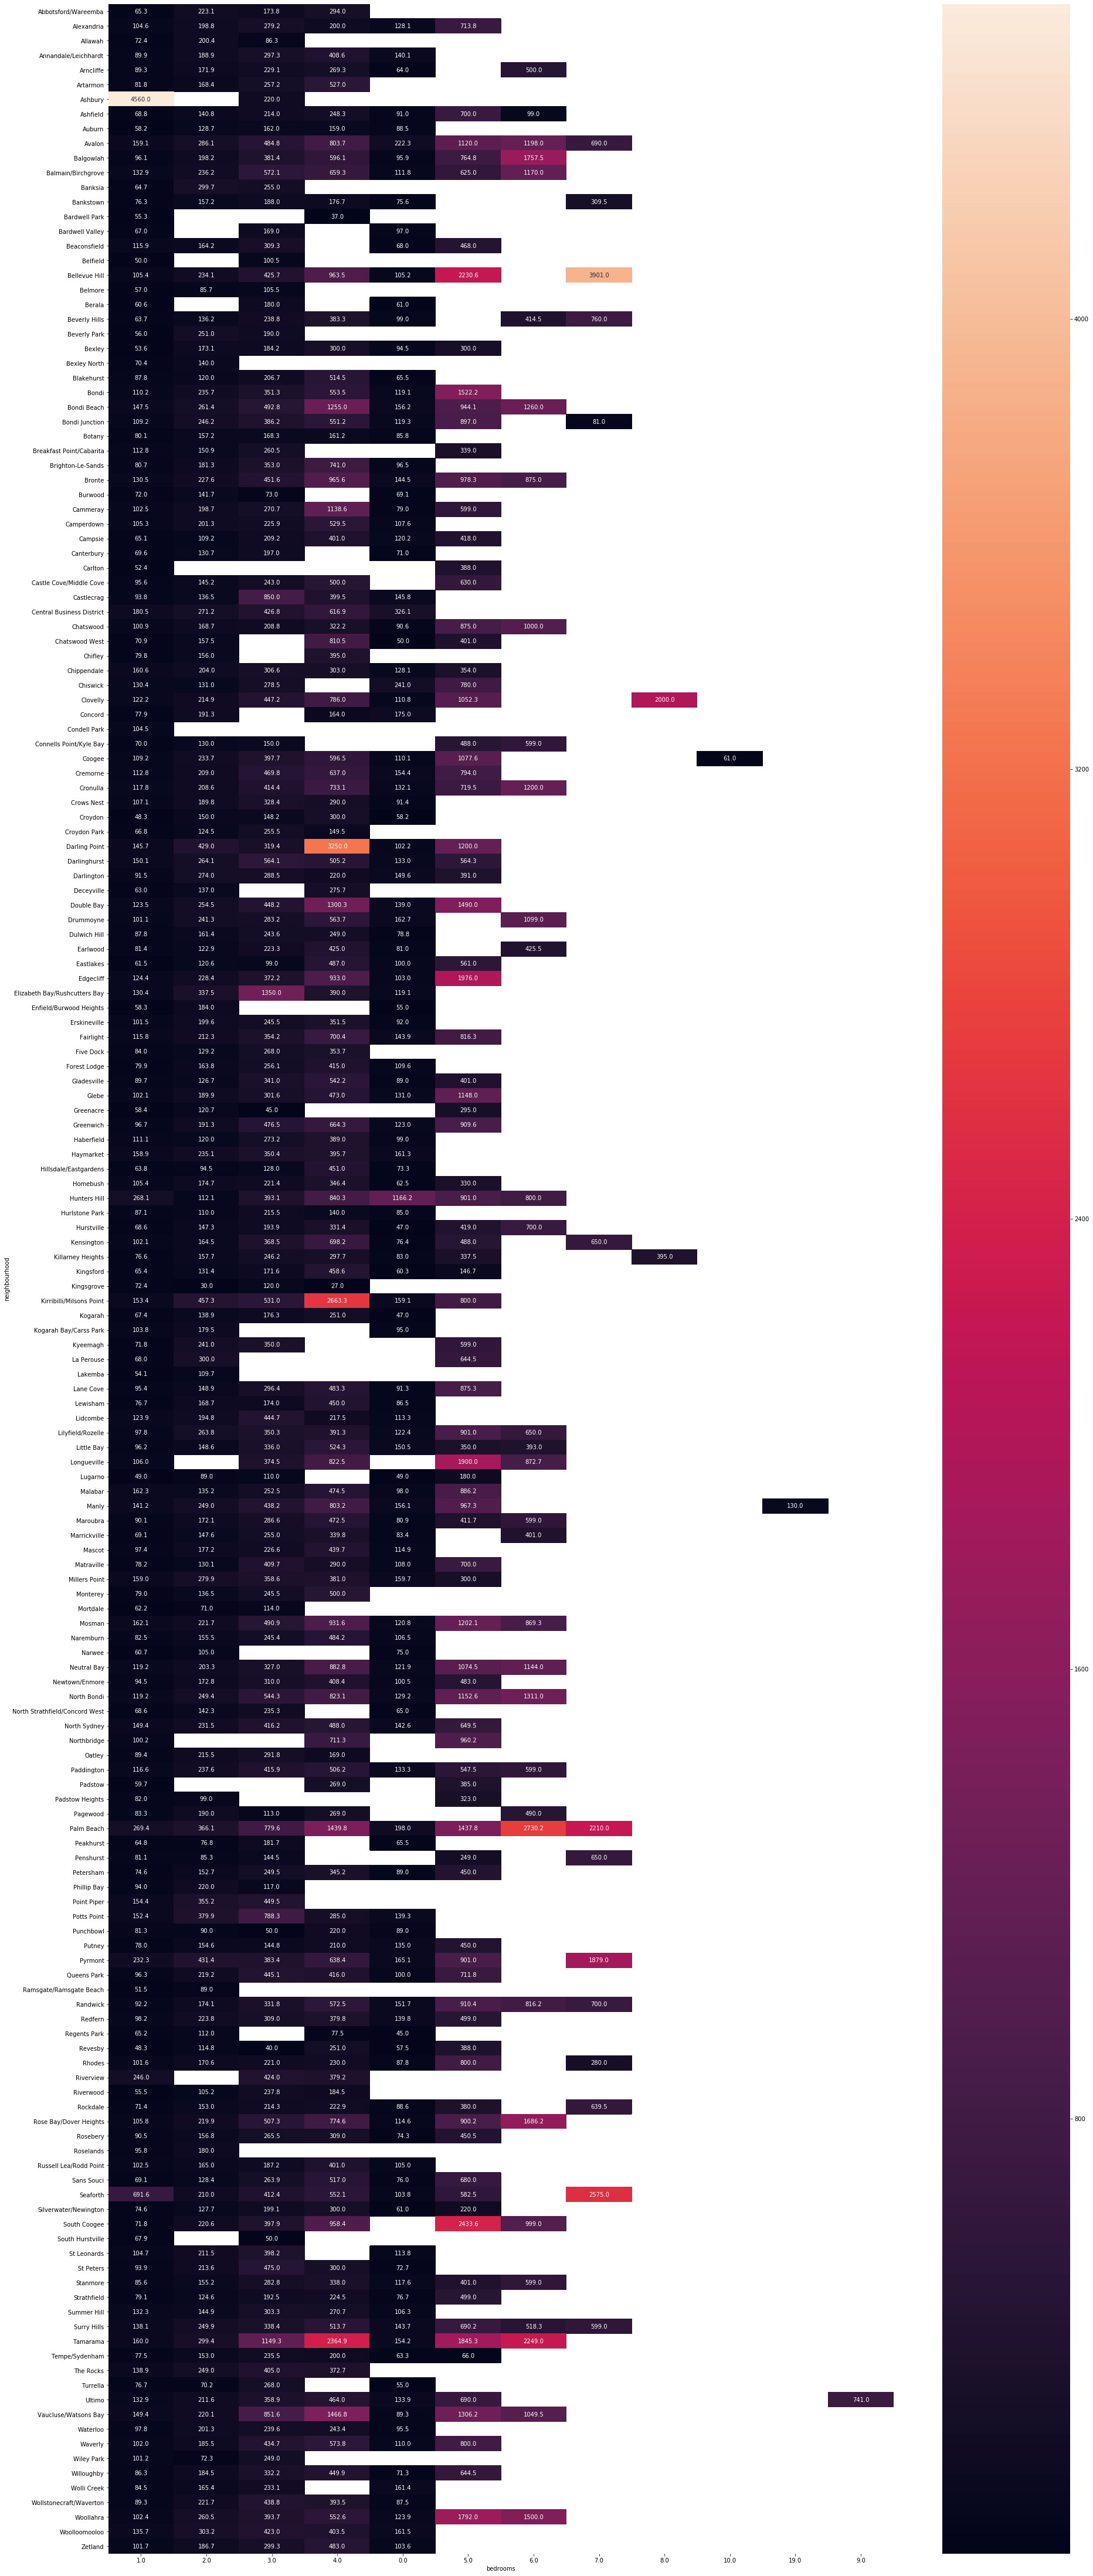

In [72]:
hm = plt.figure(figsize=(30, 80))
seaborn.heatmap(data2.groupby(['neighbourhood', 'bedrooms']).price.mean().unstack(), annot=True, fmt=".1f")
hm.show()

The heatmap above is generally just a very detailed heatmap chart highlighting prices for every suburbs, the most expensive average price here would be the Central Business District and Redfern followed by Green square and the outskirt of the CBD. We also realise a pattern that apartments within the CBD generally have less than 4 rooms as there are insufficient spaces in the CBD. If we look at more rural areas such as Eastlake and central coast, we tend to find more bedrooms and lower prices as there are more space and the land prices there are generally lowered.

The heatmap above is generally just a very detailed heatmap chart highlighting prices for every suburbs, the most expensive average price here would be the Central Business District and Redfern followed by Green square and the outskirt of the CBD. We also realise a pattern that apartments within the CBD generally have less than 4 rooms as there are insufficient spaces in the CBD. If we look at more rural areas such as Eastlake and central coast, we tend to find more bedrooms and lower prices as there are more space and the land prices there are generally lowered.

# 5. Price Trends  + Cancellation Policy + Reviews In Accordance To Price Range


## 5.1 - Average Monthly Price 2019 to 2020


## 5.2 - Cancellation Policy For Airbnb Listings


## 5.3 - Reviews Based on Prices


## 5.4 - Monthly Median Prices


## 5.5 - Monthly Average Prices

## 5.1 - Let's make an index and dictionary for the average price for each month of 2019 which we can use later for the price trends.

In [74]:
yeardata3=data3.groupby(['Year','Month']).price.mean()
yeardata3=yeardata3.reset_index()
yeardata3=yeardata3.rename(columns={'price':'average_Price'})
yeardata3['year-Month']=yeardata3['Year'].map(str) + "-" + yeardata3['Month'].map(str)
yeardata3.to_csv('year_month_data.csv')
yeardata3.head()

,Year,Month,average_Price,year-Month
0,2019,07,194.768872,2019-07
1,2019,08,197.416662,2019-08
2,2019,09,200.284955,2019-09
3,2019,10,202.558245,2019-10
4,2019,11,207.650058,2019-11


In [75]:
yeardata3.head(13)

,Year,Month,average_Price,year-Month
0,2019,07,194.768872,2019-07
1,2019,08,197.416662,2019-08
2,2019,09,200.284955,2019-09
3,2019,10,202.558245,2019-10
4,2019,11,207.650058,2019-11
5,2019,12,225.396808,2019-12
6,2020,01,225.981962,2020-01
7,2020,02,218.654635,2020-02
8,2020,03,216.881727,2020-03
9,2020,04,216.105679,2020-04


## Let's Visualize this index into a chart 

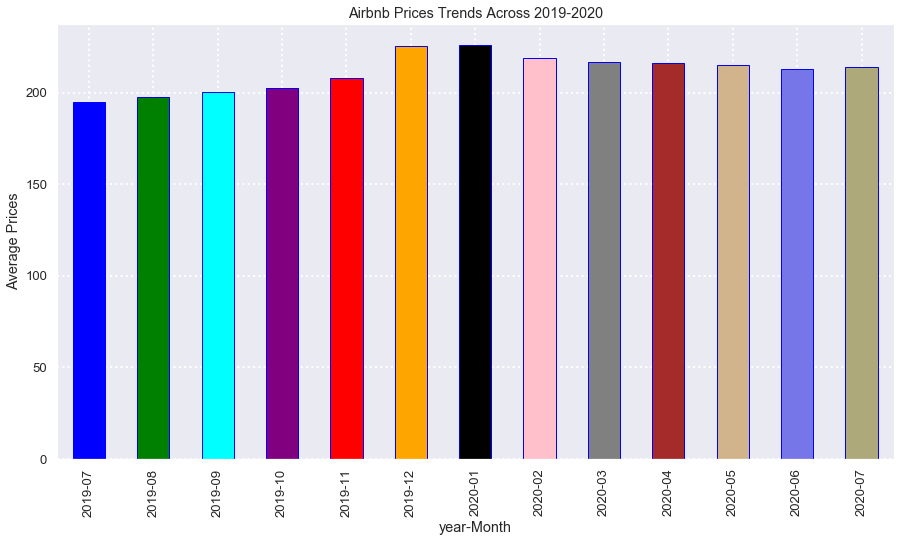

In [43]:
objects = yeardata3['year-Month']
y_pos = yeardata3['average_Price']
yeardata3.plot(kind='bar', x='year-Month',y='average_Price',edgecolor='blue', color=['blue', 'green', 'cyan', 'purple', 'red', 'orange', 'black','pink','gray','brown','tan','#7676E9', '#AEA97B','#5D6FE3'], figsize =(15,8), title = 'Airbnb Prices Trends Across 2019-2020', legend = False)
ylabel('Average Prices')
plt.grid(linestyle=':', linewidth=2)
plt.show()

The trend shows that prices are generally higher between November to January which is caused by holidays such as christmas and chinese new years.

## 5.2 - Moving Onto the trend of cancellation policy of Airbnb Sydney

In [80]:
canceldata = data2.cancellation_policy
cp = Counter(canceldata)
cp.pop("super_strict_30", None)
cp.pop("super_strict_60", None)
cp.pop("luxury_no_refund", None)
cp.pop("luxury_moderate", None)
cp.pop("luxury_super_strict_125", None)
cp.pop("luxury_super_strict_95", None)
cp.pop("nan", None)

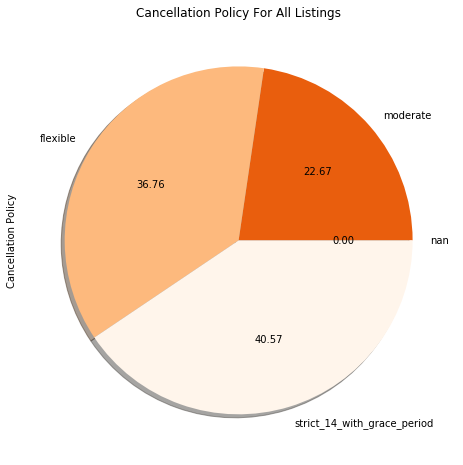

In [81]:
canceldata_data2 = pandas.DataFrame.from_dict(cp, orient='index').sort_values(by=0)
canceldata_data2.columns = ['Cancellation Policy']
canceldata_data2.plot.pie(y = 'Cancellation Policy',
                   colormap = 'Oranges_r',
                   figsize=(8,8), 
                   fontsize = 10, 
                   shadow = True,
                   autopct = '%3.2f',
                   legend = False,
                   title = "Cancellation Policy For All Listings")

## 5.3 - Reviews Based On Prices

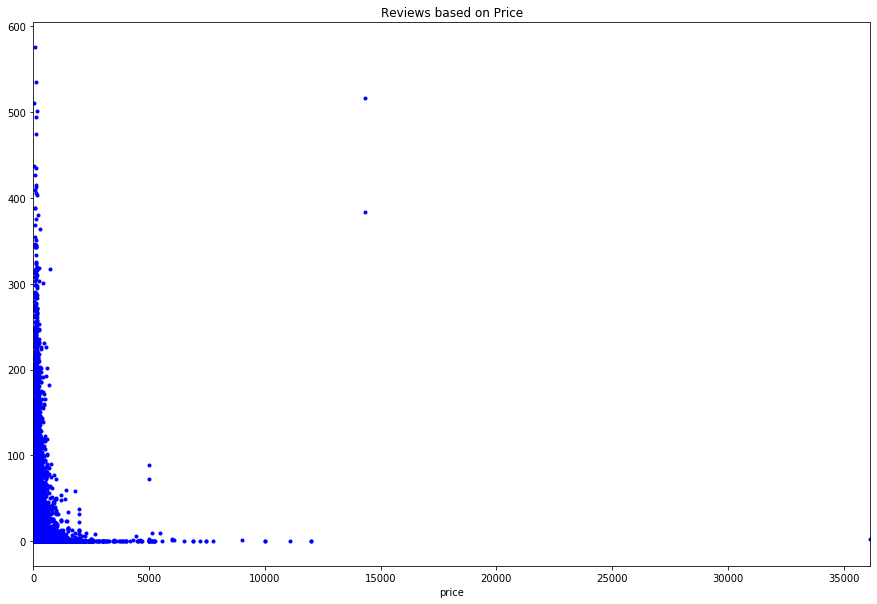

In [11]:
price_review = data2[['number_of_reviews', 'price']].sort_values(by = 'price')
price_review.plot(x = 'price', y = 'number_of_reviews', style = '.',color = 'blue', figsize =(15,10),legend = False, title = 'Reviews based on Price')

This Indicates that majority of the people book rooms with a range of $ 100 - $ 300 as most reviews are clustered around that range. As the price increase, the more scarce the reviews are.

# 5.4 - Monthly Median Price 

In [260]:
def timeplot(data, feat, title):
    
    plt.figure(figsize=(15,8))
    
    x = [datetime.strptime(date, '%Y-%m-%d') for date in data.index]
    y = data[feat]
    y_smooth = gaussian_filter1d(y, sigma=5)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.plot(x, y_smooth, 'c-')
    plt.show()

In [261]:
price_median = data3[['date', 'price']].groupby('date').median()

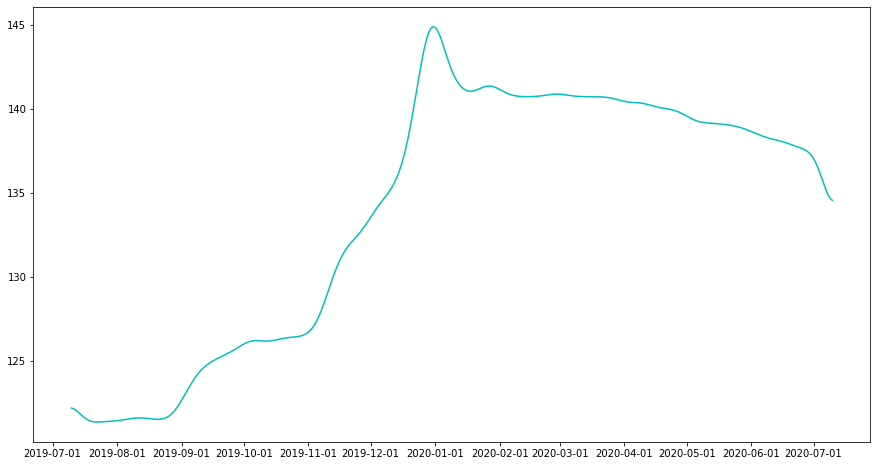

In [262]:
timeplot(price_median, 'price', title = 'Median Price Average')

# 5.5 - Average Price Monthly

In [263]:
price_average = data3[['date', 'price']].groupby('date').mean()

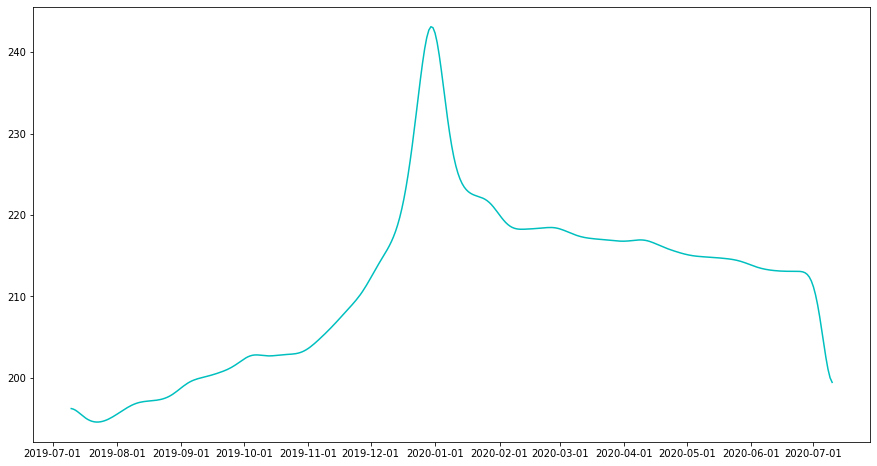

In [264]:
timeplot(price_average, 'price', title = 'Median Price Average')

After analysing both Mean and Median price, the pattern is quite similar and the uprising trend in December to January are properly because of Christmas and Chinese New Years.

# 6. Now let's focus onto the locations of these Airbnb hostings across Sydney

## 6.1 - Latitude + Longitude Histogram

## 6.2 - Visualized Map Of Hostings

## 6.3 - Room Types Sorted Map

## 6.4 - Putting it all together

## 6.1 - Histogram Of The Latitude + Longitude Of Airbnb Listings

When looking at locations of Airbnb Hostings, we will be visualizing the different locations of the listings onto a map making it easier for readers to understand. 

''

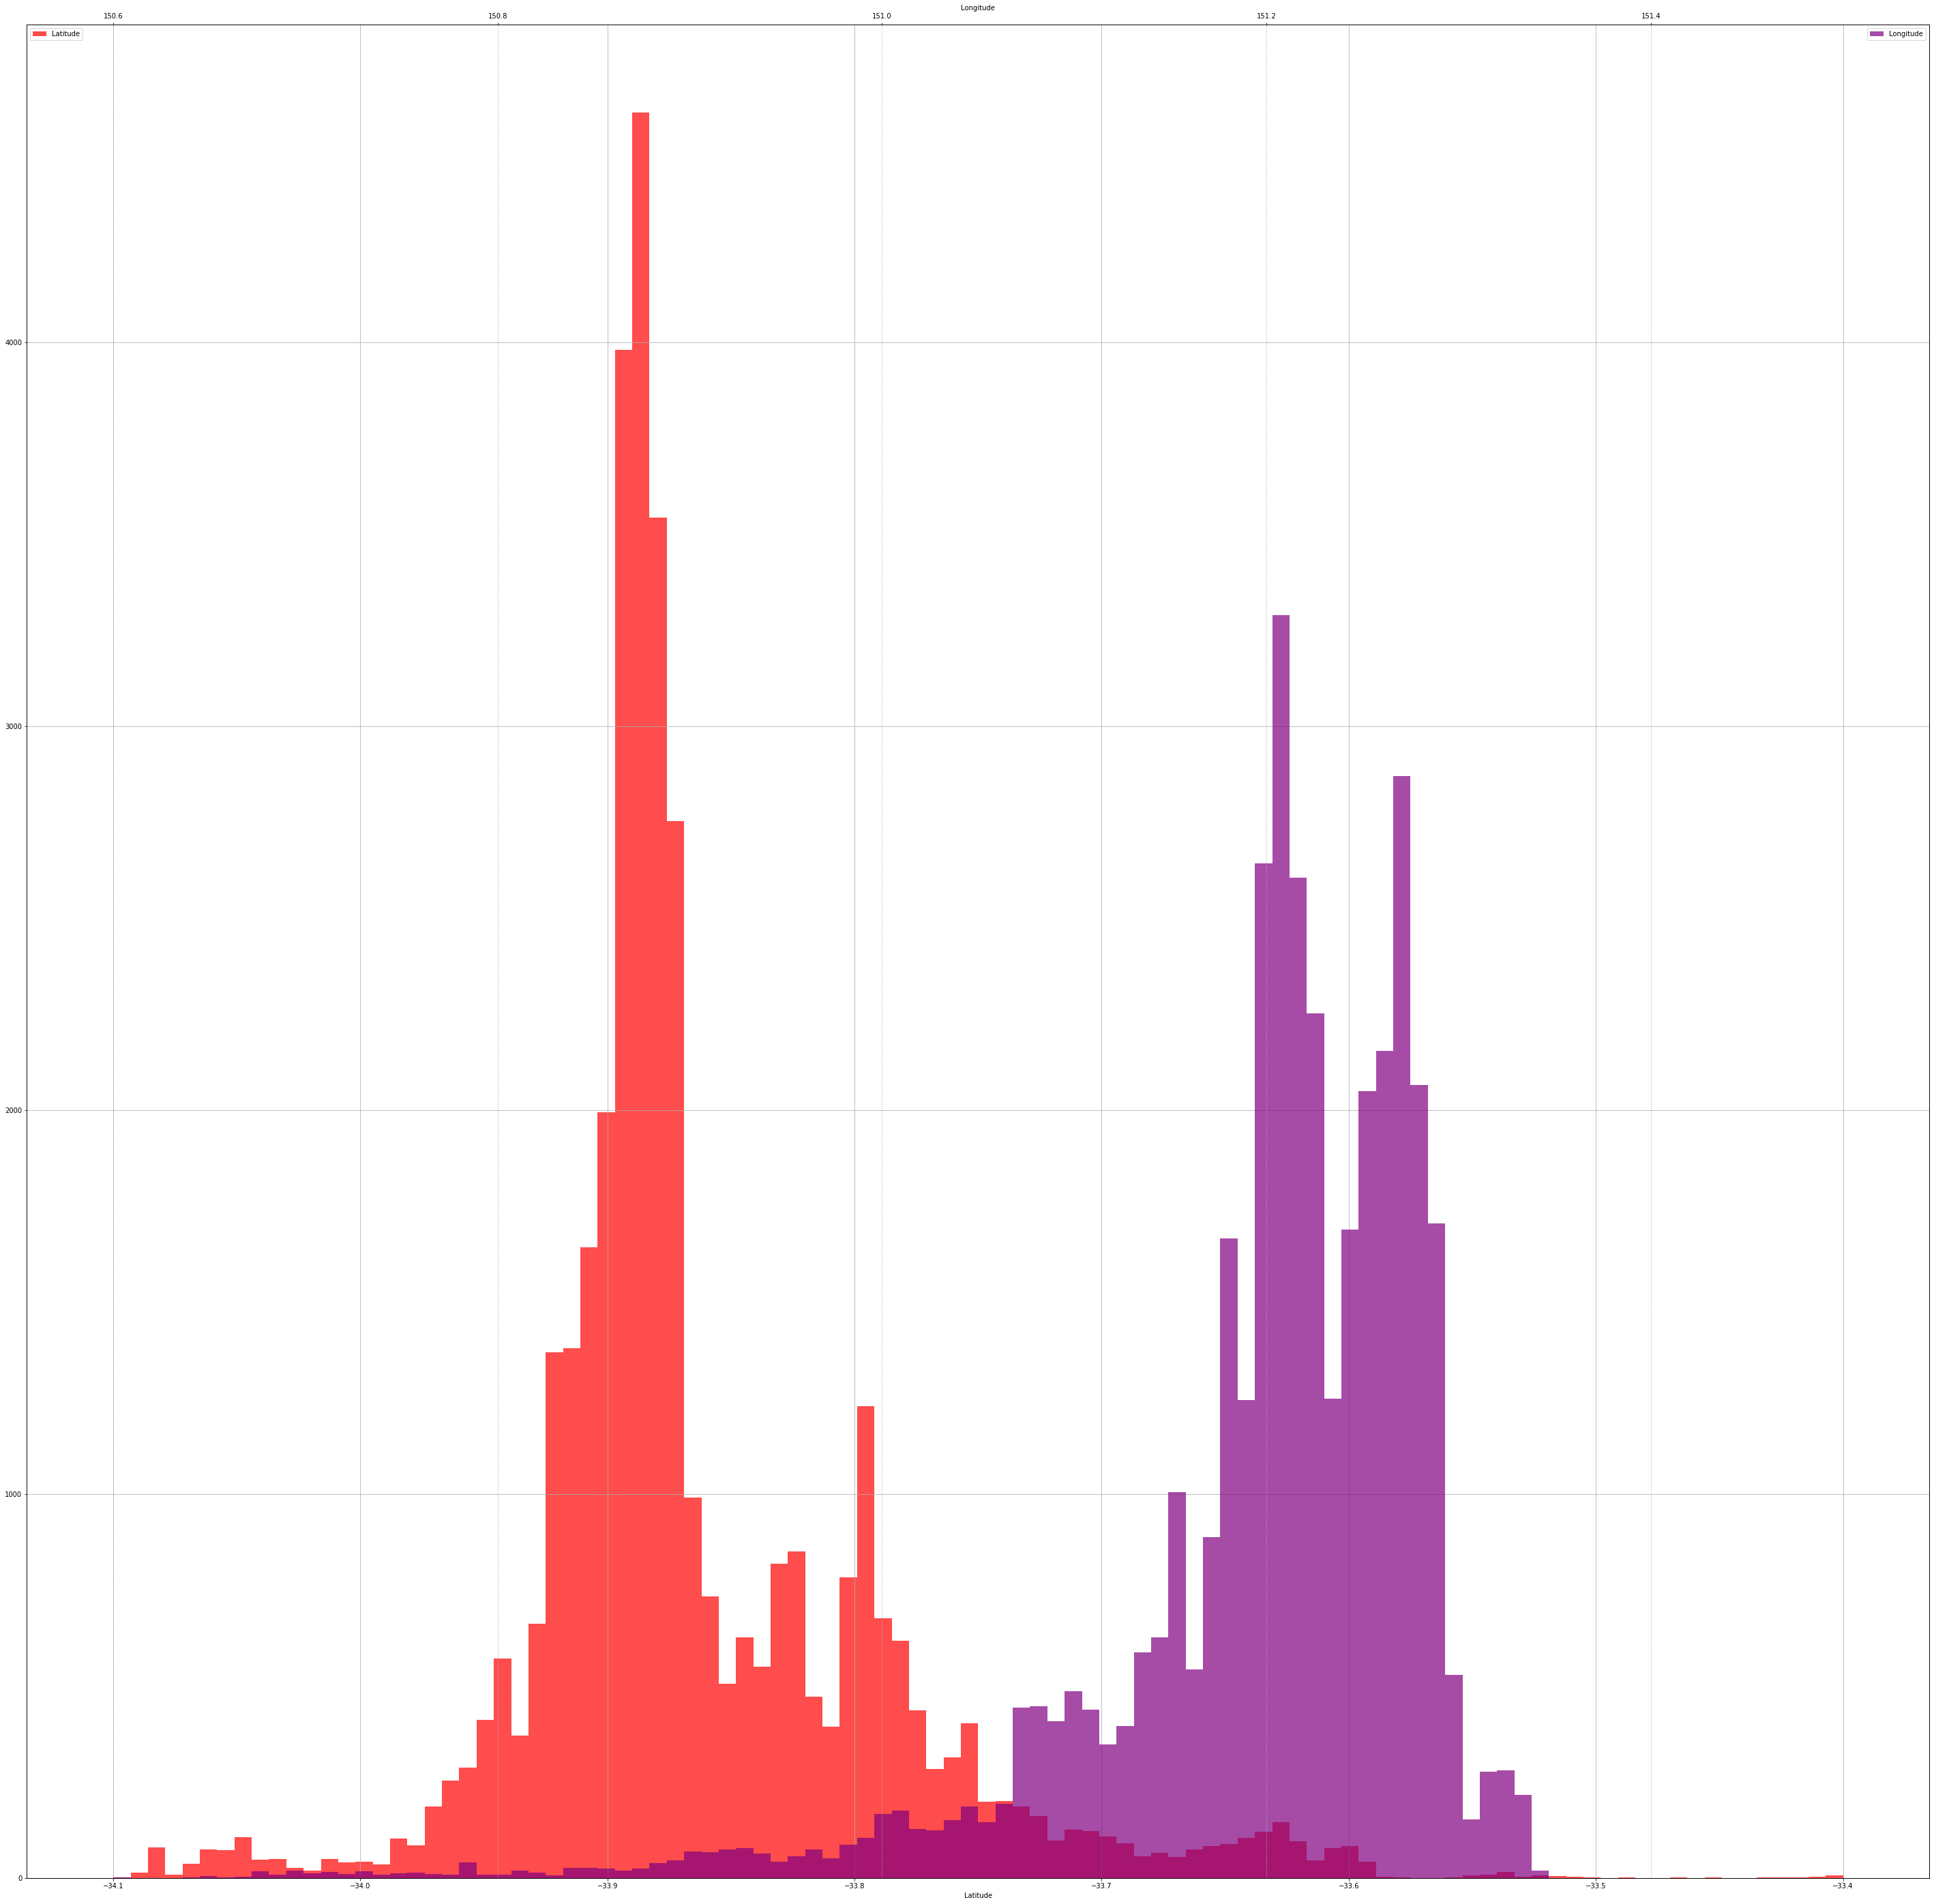

In [194]:
hist(data['latitude'], bins = 100, range = (-34.1, -33.4), rwidth = 1, alpha = .7, color = "Red", label = 'Latitude')
xlabel("Latitude")
grid()
legend(loc="upper left")
twiny()
hist(data['longitude'], bins = 100, range = (150.6, 151.5), rwidth = 1, alpha = .7, color = "Purple", label = 'Longitude')
xlabel("Longitude")
grid()
legend(loc="upper right")
plt.grid(linestyle=':', linewidth=1)
;

## 6.2 - Visualized Map Of Hosting

Text(0, 0.5, 'Latitude')

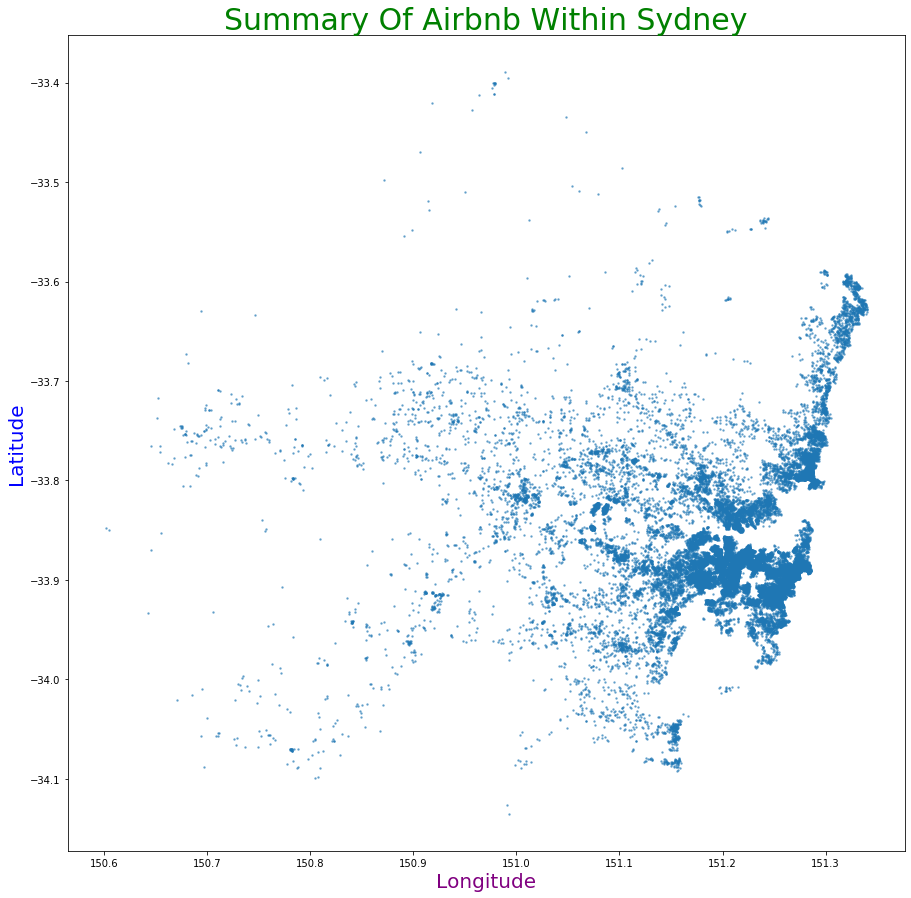

In [197]:
figure(figsize=(15,15))
plot((data['longitude']), data['latitude'], '.',ms=3, alpha=.5)
title('Summary Of Airbnb Within Sydney', color = 'green',size=30)
xlabel('Longitude', color = 'purple', size=20)
ylabel('Latitude', color = 'b', size=20)

#Aparrtment show red House color other 

As you can see on the graph, the listings is usually gathered inside of the CBD where most Airbnb hostings are listed. 
But this does not really tell us everything about the hosting. So let's dig deeper and go more in-depth. We will be able to explore deeper by exploring each room types and checking them individually on the map which will tell us more.

## 6.3 - Sorted Room Types Map

                                    Green stands for Private Apartments
                                    
                                    Purple stands for Shared Room
                                    
                                    Red stands for Entire Apt / House

In [83]:
list = []
for type in data['room_type']:
    if type >= str("Private Room"):
        list.append(True)
    else:
        list.append(False)

list2 = []
for type in data['room_type']:
    if type >= str("Shared Room"):
        list2.append(True)
    else:
        list2.append(False)
        
list3 = []
for type in data['room_type']:
    if type == str("Entire home/apt"):
        list3.append(True)
    else:
        list3.append(False)

        # Creating Variables
privateapt = pandas.Series(list)
shared = pandas.Series(list2)
entire = pandas.Series(list3)

loc1 = data[entire]
loc2 = data[shared]
loc3 = data[privateapt]

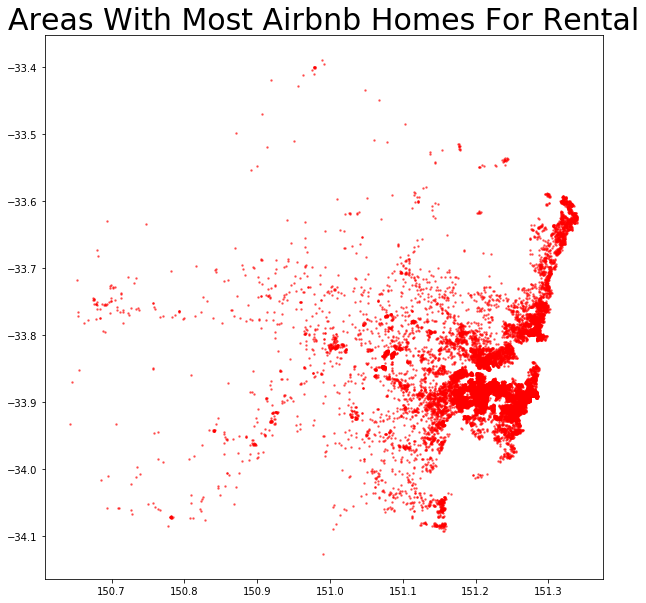

In [86]:
figure(figsize=(10,10))
plot((loc1['longitude']), loc1['latitude'], '.',color = 'red', ms=3, alpha=.5)
title('Areas With Most Airbnb Homes For Rental', color = 'black',size=30)
plt.show()

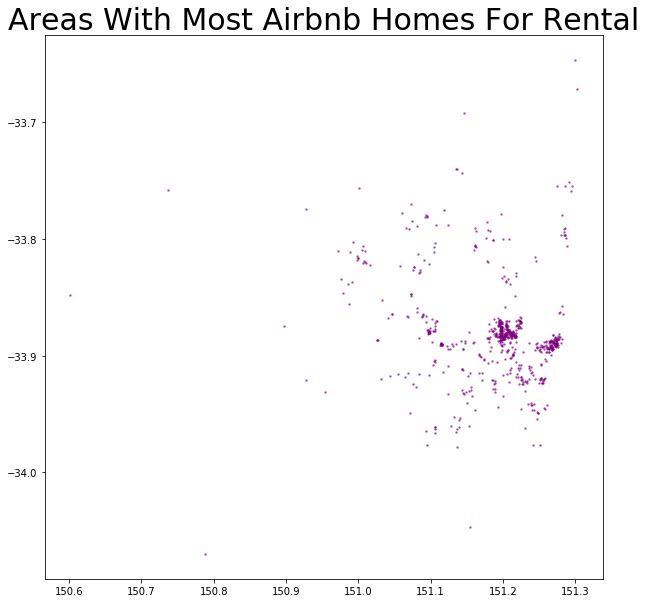

In [88]:
figure(figsize=(10,10))
plot((loc2['longitude']), loc2['latitude'], '.',color = 'purple', ms=3, alpha=.5)
title('Areas With Most Airbnb Homes For Rental', color = 'black',size=30)
plt.show()

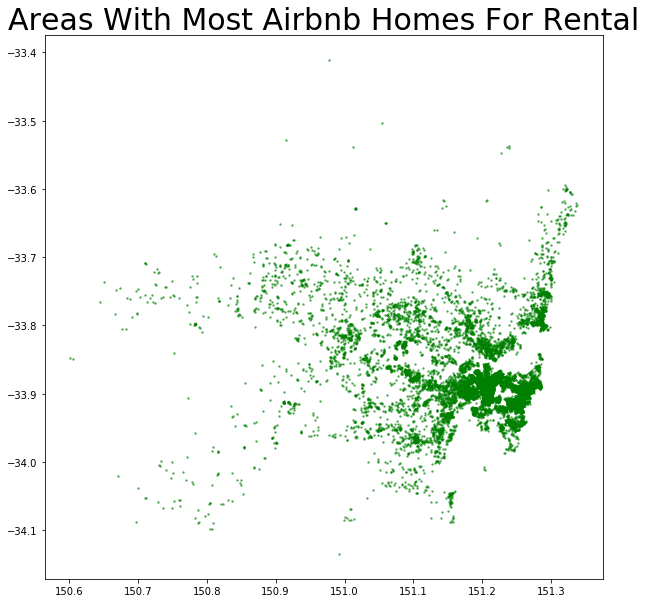

In [89]:
figure(figsize=(10,10))
plot((loc3['longitude']), loc3['latitude'], '.',color = 'green', ms=3, alpha=.5)
title('Areas With Most Airbnb Homes For Rental', color = 'black',size=30)
plt.show()

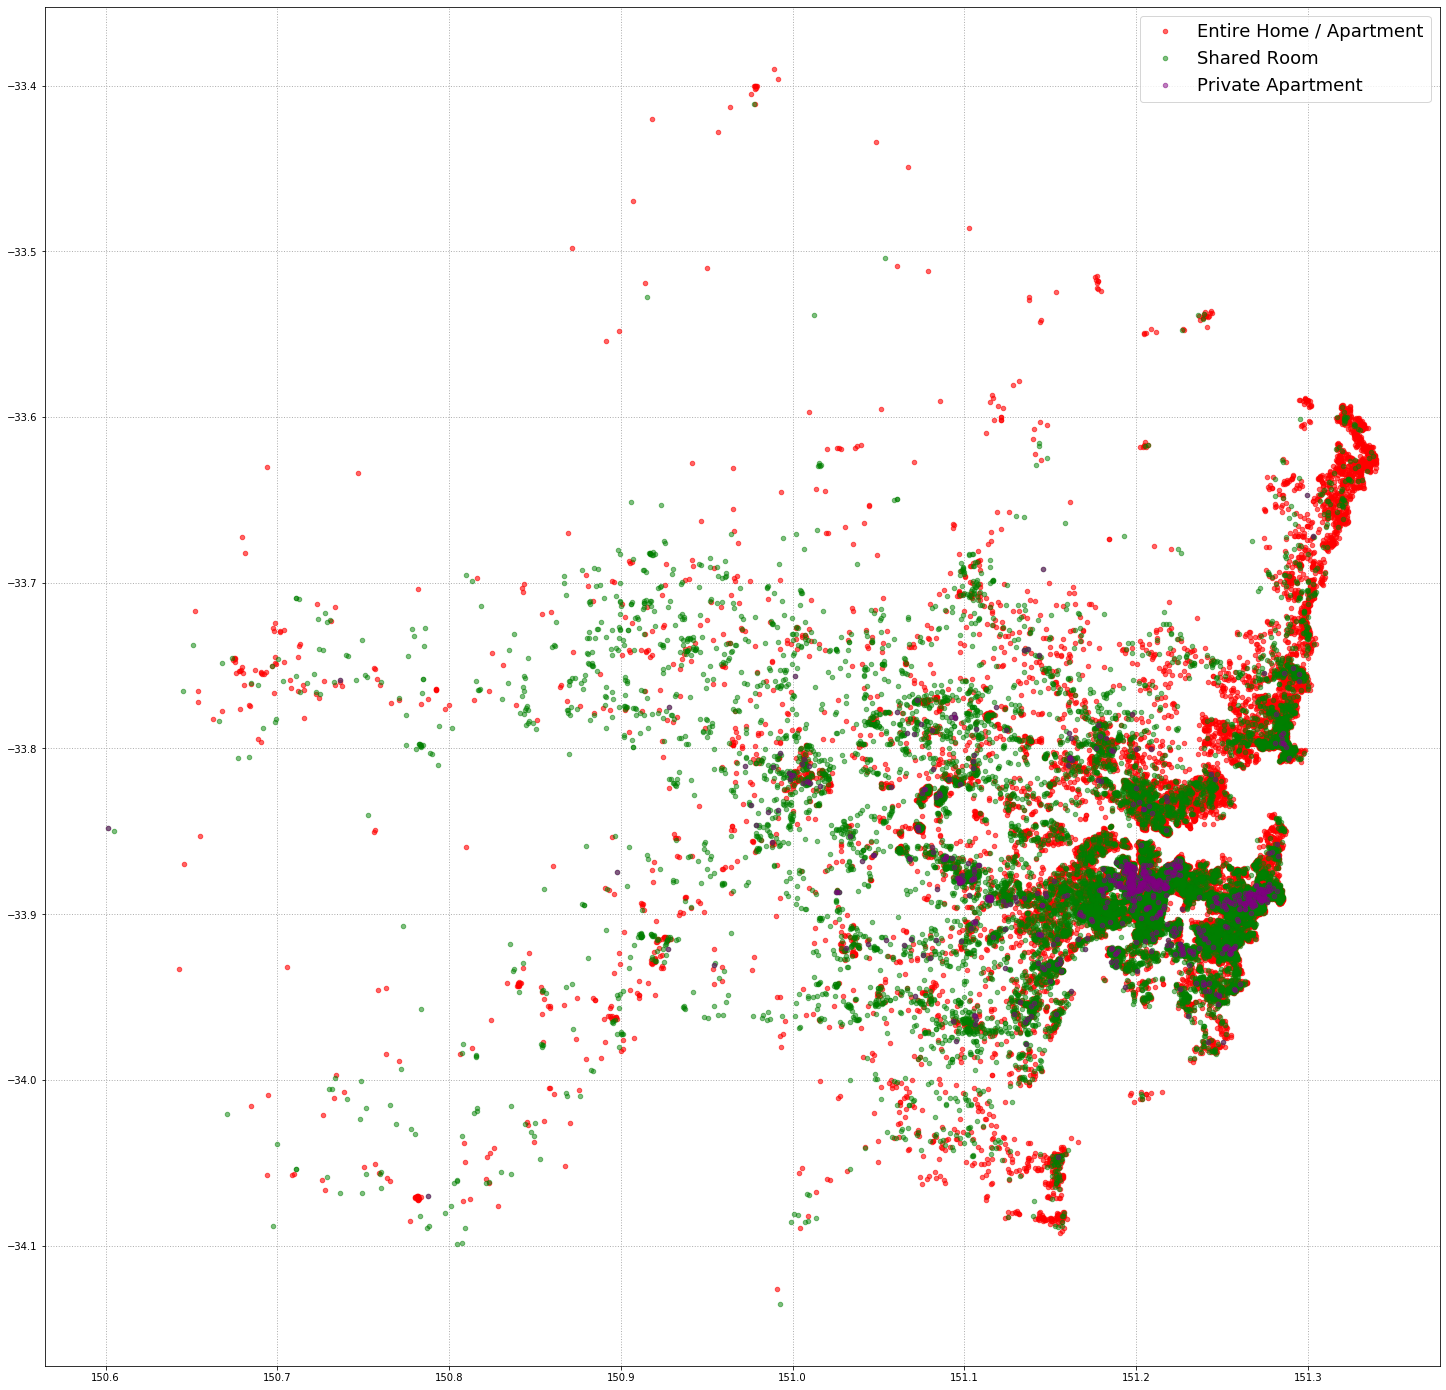

In [91]:
figure(figsize=(25,25))
plot((loc1['longitude']), loc1['latitude'], '.',color = 'red', ms=9, alpha=.6, label = 'Entire Home / Apartment')
plot((loc3['longitude']), loc3['latitude'], '.',color = 'green', ms=9, alpha=.5, label = 'Shared Room')
plot((loc2['longitude']), loc2['latitude'], '.',color = 'purple', ms=9, alpha=.5, label = 'Private Apartment')
plt.legend(fontsize=18)
grid(linestyle=':', linewidth=1)
plt.show()


# Mapping Together The Regions

After completing the map, let's combine everything together on a map and finish it off.

After completing the map, let's make these details more visualizing by adding a few unique and harder features to imply for this type of category of dataset.

In [97]:
burbs = geopandas.GeoDataFrame.from_file('NSW_LOCALITY_POLYGON_shp.shp')
burbs.drop(["NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4", "DT_RETIRE"], axis=1, inplace=True)
burbs.tail(2)

town1 = burbs.iloc[0]

def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)
right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
burbs["distance_from_UNSW"] = burbs.geometry.distance(right_here)

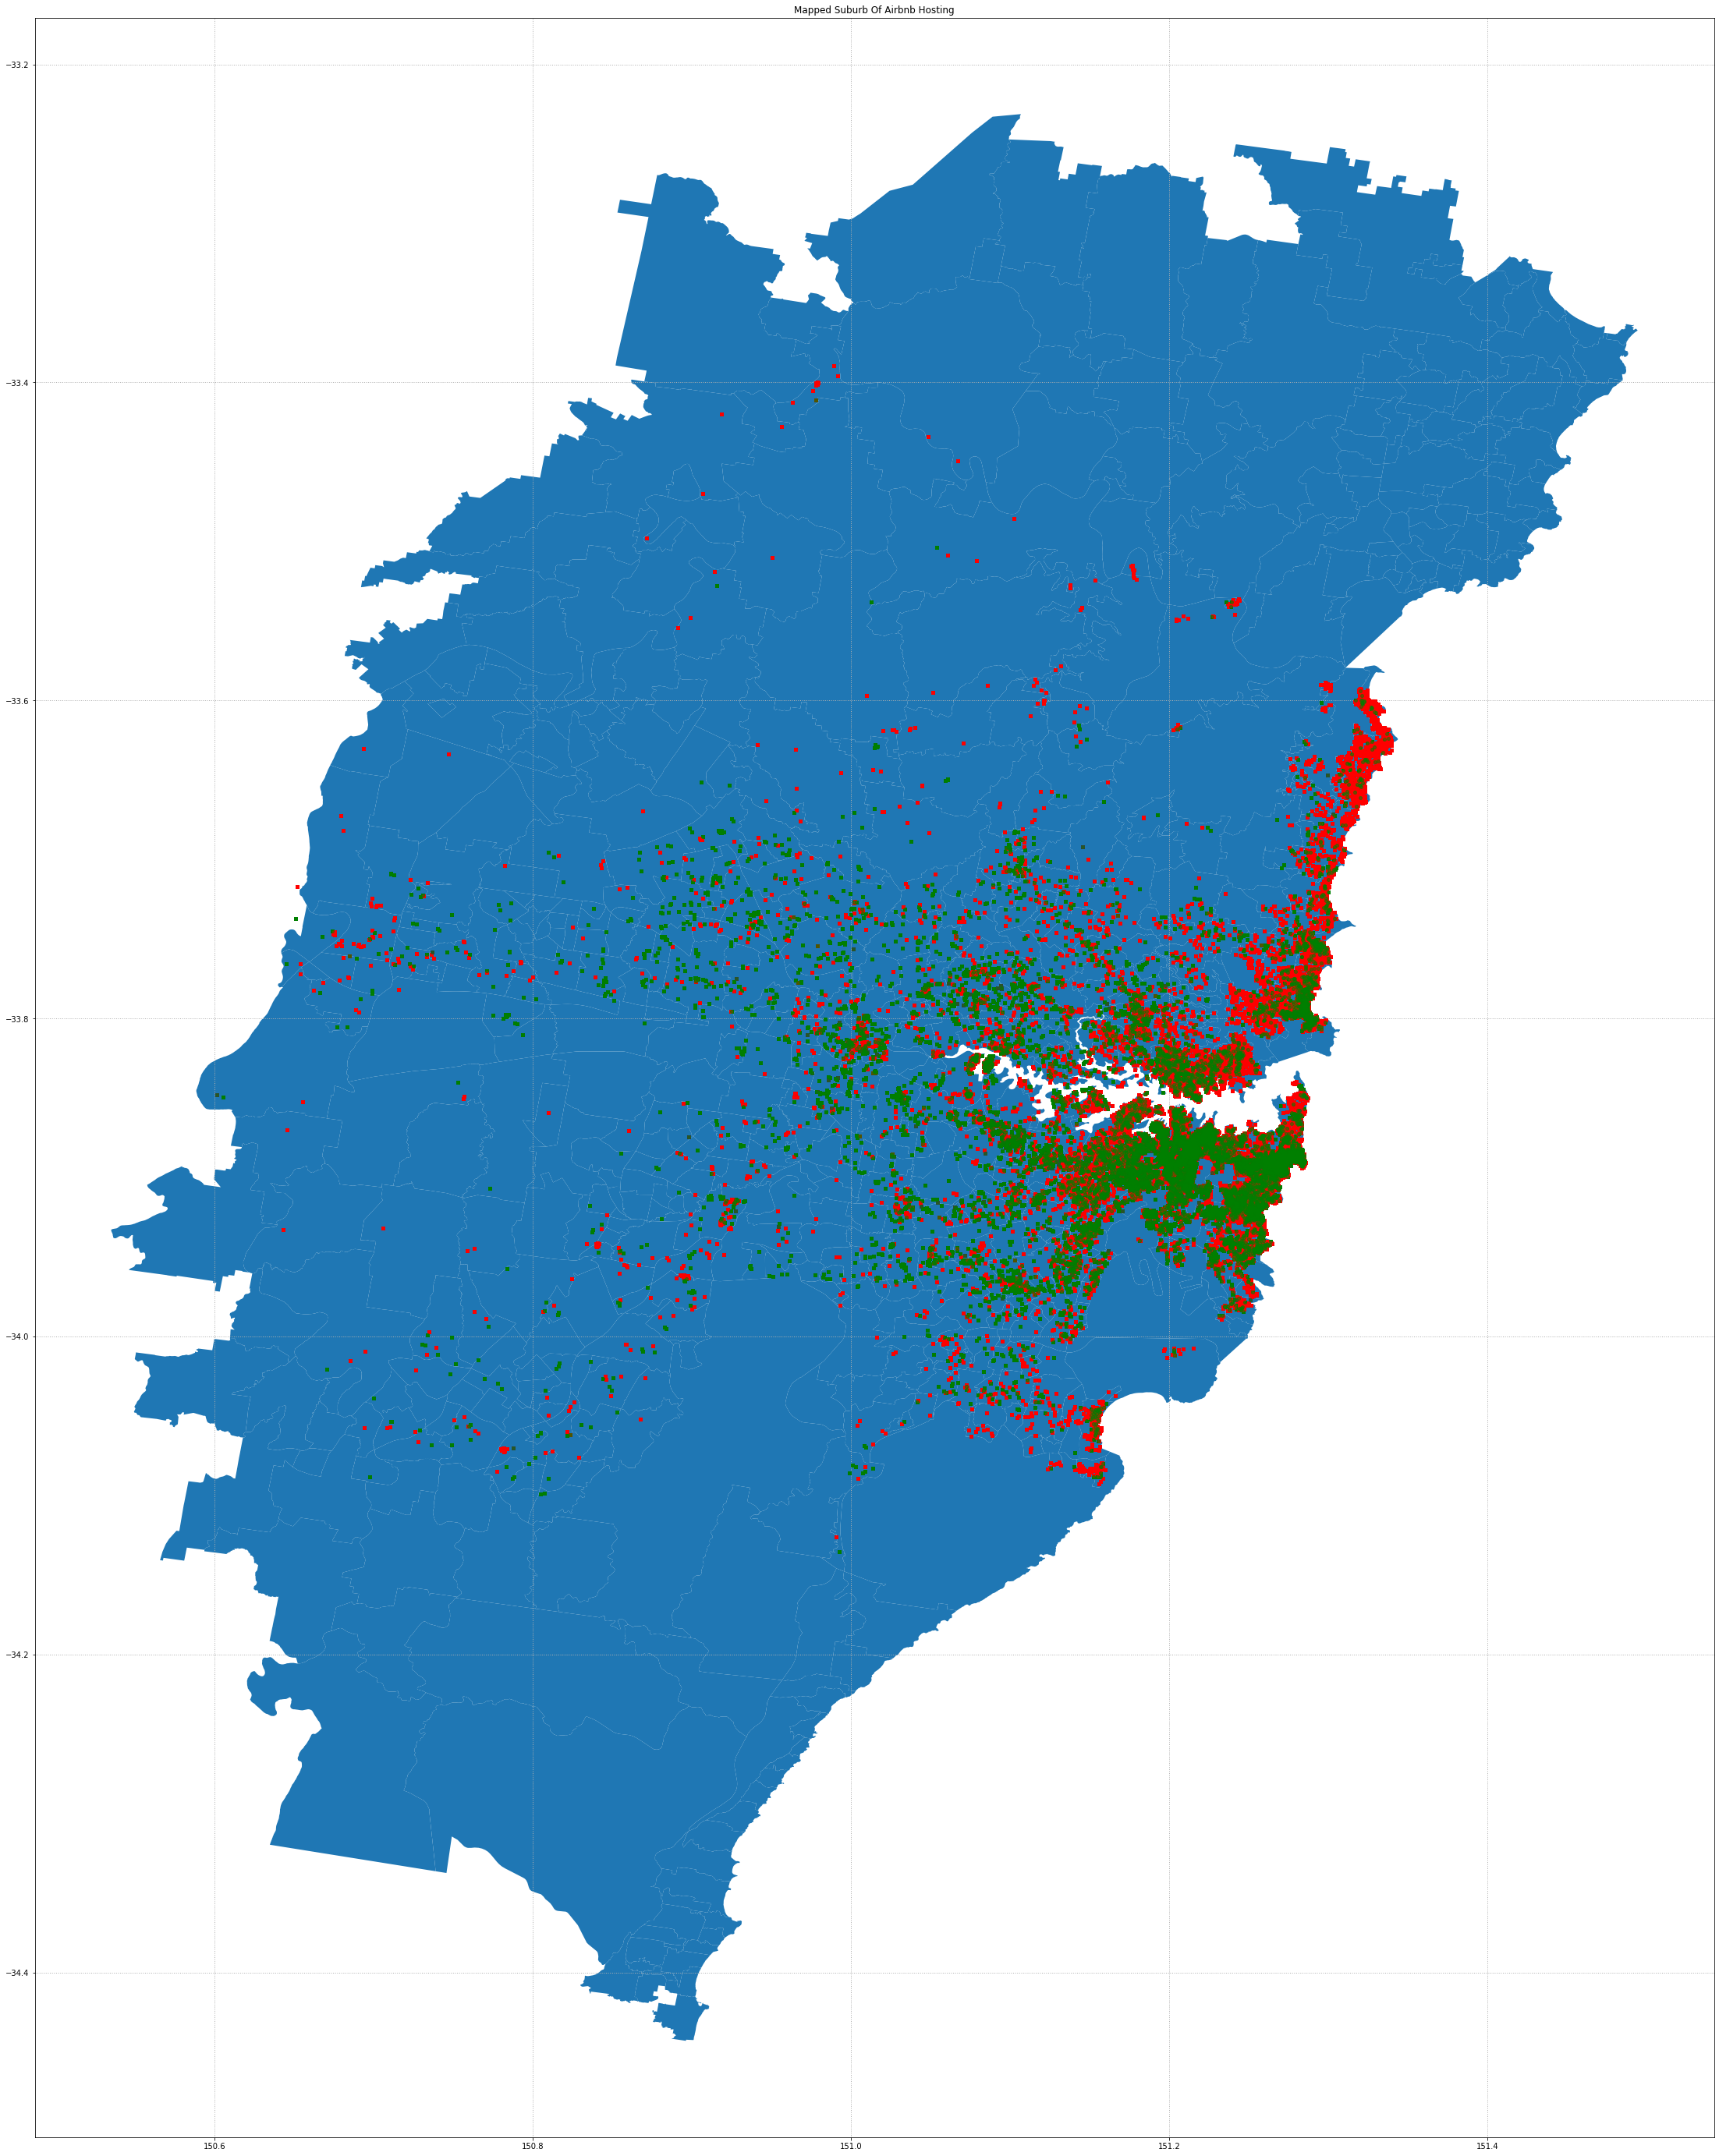

In [96]:
really_close_burbs = burbs[burbs.distance_from_UNSW<0.6]
really_close_burbs.plot()
for idx, row in really_close_burbs.iterrows():
    plot((loc1['longitude']), loc1['latitude'], '.',color = 'red', ms=8, alpha=.5, label = 'Entire Home / Apartment')
    plot((loc2['longitude']), loc2['latitude'], '.',color = 'purple', ms=8, alpha=.5, label = 'Shared Room')
    plot((loc3['longitude']), loc3['latitude'], '.',color = 'green', ms=8, alpha=.5, label = 'Private Apartment')
    plt.grid(linestyle=':', linewidth=1)
    title("Mapped Suburb Of Airbnb Hosting");

After looking into more details, we find that shared room are very rare and can only be seen a little bit within the CBD. However, entire homes are very common up in the gold coast as there are many housing spaces available which leads us to private apartments which are gnerally clustered within the CBD.

# END Of Presentation 